# TX Poker 

## Clustering

### Libraries

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

### Dataset
On récupère les data qui servent à entrainer notre cluster

In [25]:
dataset = pd.read_csv("data.csv", encoding= 'ISO-8859-1')

In [26]:
dataset.head()

,vpip,ratio action
0,1.00,-0.08
1,0.00,1.00
2,0.67,0.23
3,1.00,0.00
4,1.00,0.14


In [27]:
dataset = dataset.to_numpy() #A la base c'est un fichier pandas, je passe le fichier en numpy pour l'algo

In [28]:
neg_rows = np.any(dataset <= 0, axis=1)

In [29]:
dataset = dataset[~neg_rows]

In [30]:
dataset

array([[0.67, 0.23],
       [1.  , 0.14],
       [1.  , 0.33],
       [0.34, 0.31],
       [0.35, 0.41],
       [0.54, 0.57],
       [0.45, 0.4 ],
       [0.45, 0.3 ],
       [0.4 , 0.28],
       [0.77, 0.59],
       [0.69, 0.63],
       [1.  , 1.  ],
       [0.5 , 0.21],
       [0.13, 0.72],
       [0.12, 0.7 ],
       [0.44, 0.5 ],
       [0.49, 0.35],
       [0.01, 0.99],
       [0.43, 0.17],
       [0.95, 0.32],
       [1.  , 0.6 ],
       [0.51, 0.22],
       [0.75, 0.27],
       [0.81, 0.66],
       [0.36, 0.27],
       [0.56, 0.46],
       [0.53, 0.57],
       [1.  , 0.33],
       [0.31, 0.4 ],
       [0.45, 0.32],
       [0.16, 0.56],
       [0.15, 0.56],
       [0.13, 0.68],
       [0.4 , 0.44],
       [0.13, 0.69],
       [0.05, 0.96],
       [0.04, 0.77],
       [0.5 , 0.21],
       [1.  , 0.4 ],
       [0.13, 0.55],
       [0.48, 0.53],
       [0.13, 0.69],
       [0.13, 0.69],
       [0.5 , 0.67],
       [0.57, 0.55],
       [0.51, 0.29],
       [0.61, 0.51],
       [0.49,

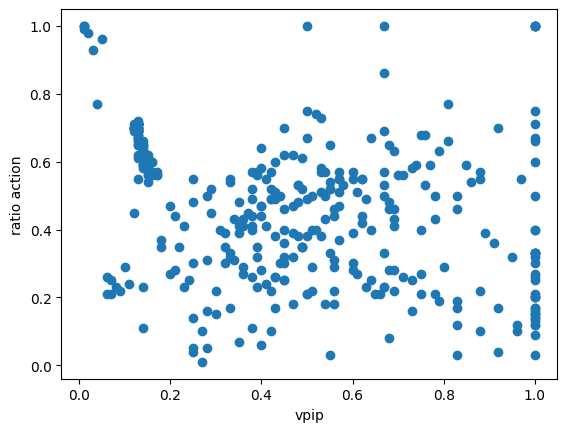

In [32]:
#Petit plot rapide
plt.scatter(dataset[:,0],dataset[:,1])
plt.xlabel('vpip')
plt.ylabel('ratio action')
plt.show()

### Cluster

In [33]:
from sklearn.cluster import KMeans

n_clusters = 4
kmeans = KMeans(n_clusters=n_clusters, random_state=0, n_init="auto").fit(dataset)

In [34]:
labels = kmeans.labels_

In [ ]:
labels

array([1, 2, 1, 1, 2, 2, 2, 1, 1, 1, 2, 2, 2, 1, 1, 2, 2, 1, 1, 1, 3, 1,
       1, 1, 1, 3, 3, 3, 1, 1, 1, 1, 1, 1, 3, 0, 1, 1, 1, 3, 1, 1, 0, 1,
       0, 1, 3, 1, 1, 3, 3, 0, 1, 0, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       0, 1, 0, 1, 0, 1, 2, 2, 2, 2, 2, 1, 3, 1, 0, 1, 1, 1, 1, 0, 1, 3,
       0, 1, 2, 0, 2, 0, 2, 3, 2, 1, 2, 1, 2, 1, 0, 0, 3, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 3, 1, 1, 2, 1, 1, 2, 0, 2, 2, 1, 0,
       1, 3, 0, 1, 1, 1, 3, 1, 0, 1, 1, 1, 1, 3, 1, 1, 3, 1, 1, 1, 3, 1,
       1, 1, 1, 2, 1, 0, 2, 2, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 3, 3, 1, 1, 3, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 3, 1, 1, 1, 2, 0, 1, 2, 1, 1, 0, 1, 1, 2, 2, 2, 1, 1, 3, 1,
       0, 1, 1, 0, 2, 2, 3, 2, 2, 3, 2, 1, 2, 2, 1, 0, 2, 1, 1, 2],
      dtype=int32)

In [ ]:
kmeans.labels_.astype(float)

array([1., 2., 1., 1., 2., 2., 2., 1., 1., 1., 2., 2., 2., 1., 1., 2., 2.,
       1., 1., 1., 3., 1., 1., 1., 1., 3., 3., 3., 1., 1., 1., 1., 1., 1.,
       3., 0., 1., 1., 1., 3., 1., 1., 0., 1., 0., 1., 3., 1., 1., 3., 3.,
       0., 1., 0., 0., 1., 2., 1., 2., 1., 2., 1., 2., 1., 2., 1., 0., 1.,
       0., 1., 0., 1., 2., 2., 2., 2., 2., 1., 3., 1., 0., 1., 1., 1., 1.,
       0., 1., 3., 0., 1., 2., 0., 2., 0., 2., 3., 2., 1., 2., 1., 2., 1.,
       0., 0., 3., 1., 0., 1., 0., 0., 1., 1., 0., 1., 1., 1., 1., 0., 1.,
       1., 3., 1., 1., 2., 1., 1., 2., 0., 2., 2., 1., 0., 1., 3., 0., 1.,
       1., 1., 3., 1., 0., 1., 1., 1., 1., 3., 1., 1., 3., 1., 1., 1., 3.,
       1., 1., 1., 1., 2., 1., 0., 2., 2., 0., 0., 1., 1., 1., 0., 0., 1.,
       1., 0., 0., 0., 1., 0., 1., 1., 1., 1., 1., 1., 3., 3., 1., 1., 3.,
       1., 0., 0., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 3., 1., 1., 1.,
       2., 0., 1., 2., 1., 1., 0., 1., 1., 2., 2., 2., 1., 1., 3., 1., 0.,
       1., 1., 0., 2., 2.

Text(0.5, 1.0, "VPIP et ratio d'action des bots")

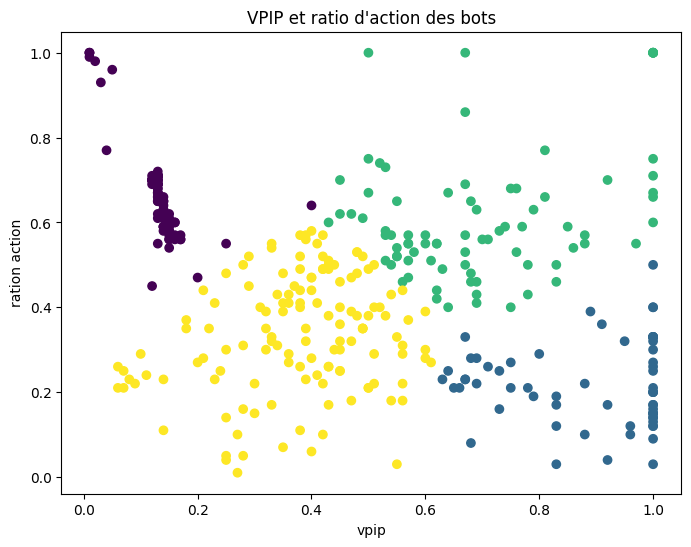

In [35]:
#Représentation des clusters
plt.figure(figsize=(8, 6))

plt.scatter(dataset[:,0], dataset[:,1], c=kmeans.labels_.astype(float))
plt.xlabel('vpip')
plt.ylabel('ration action')
plt.title("VPIP et ratio d'action des bots")

### Datatest
données où on test notre cluster pour voir dans quel cluster est mis un bot.

In [ ]:
data = pd.read_csv("data_comportement.csv", encoding= 'ISO-8859-1')

In [ ]:
data.head()

,vpip,ratio action,bot
0,1.0,0.53,random_agent
1,1.0,0.46,agent_out
2,1.0,0.15,agent_serre_agressif
3,1.0,0.18,agent_naif
4,1.0,0.98,agent_allIn


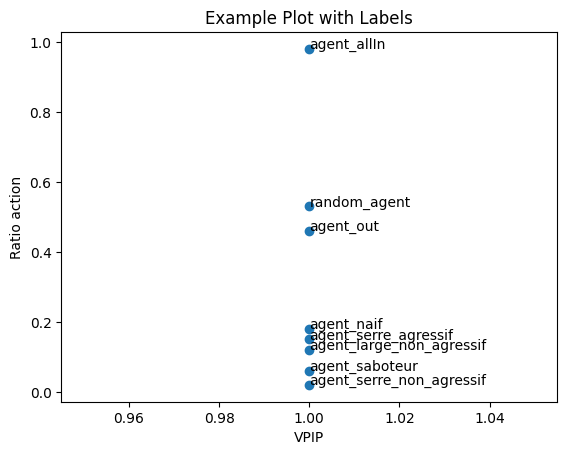

In [ ]:
fig, ax = plt.subplots()
ax.scatter(data["vpip"], data["ratio action"])

for i, label in enumerate(data["bot"]):
    ax.annotate(label, (data.loc[i, "vpip"], data.loc[i, "ratio action"]))

ax.set_title('Example Plot with Labels')
ax.set_xlabel('VPIP')
ax.set_ylabel('Ratio action')

plt.show()

In [ ]:
labels_bot = data["bot"]

In [ ]:
labels_bot

0                random_agent
1                   agent_out
2        agent_serre_agressif
3                  agent_naif
4                 agent_allIn
5              agent_saboteur
6    agent_serre_non_agressif
7    agent_large_non_agressif
Name: bot, dtype: object

In [ ]:
data_pred = data.drop("bot", axis=1)

In [ ]:
data_pred

,vpip,ratio action
0,0.49,0.56
1,0.50,0.58
2,0.15,0.15
3,0.23,0.23
4,0.88,0.88
5,0.06,0.06
6,0.02,0.02
7,0.04,0.04


In [ ]:
data_pred = data_pred.to_numpy()

In [ ]:
data_pred

array([[0.49, 0.56],
       [0.5 , 0.58],
       [0.15, 0.15],
       [0.23, 0.23],
       [0.88, 0.88],
       [0.06, 0.06],
       [0.02, 0.02],
       [0.04, 0.04]])

Text(0, 0.5, 'ratio action')

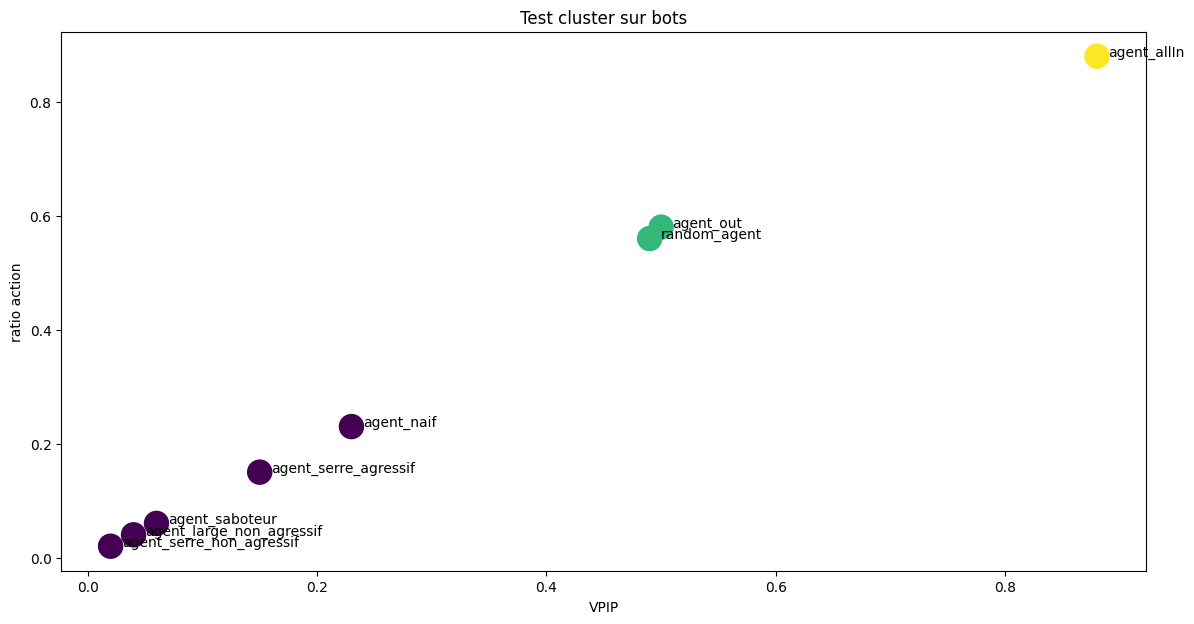

In [ ]:

w, h = 14, 7
fig, ax = plt.subplots(figsize=(w,h))
ax.scatter(data_pred[:,0], data_pred[:,1], c=kmeans.predict(data_pred), s=300)

for i, label in enumerate(labels_bot):
    ax.annotate(label, (data.loc[i, "vpip"],data.loc[i, "ratio action"]),xytext=(data_pred[i,0]+0.01, data_pred[i,1]))

ax.set_title("Test cluster sur bots")
ax.set_xlabel("VPIP")
ax.set_ylabel("ratio action")